In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
data = pd.read_csv('data/Advertising2.csv')
data.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [7]:
def scatter_plot(feature, target):
    plt.figure(figsize=(8, 6))
    plt.scatter(
        data[feature],
        data[target],
        c='blue'
)
    plt.xlabel('Money spent on {} ads ($)'.format(feature))
    plt.ylabel('Sales ($k)')
    plt.show()

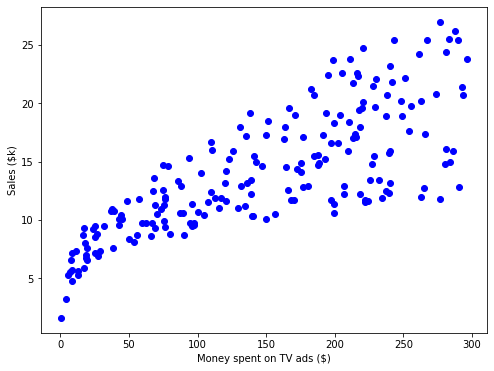

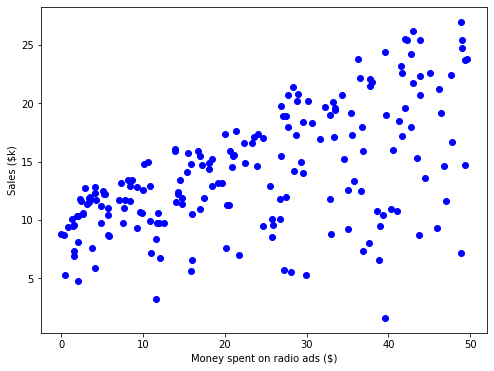

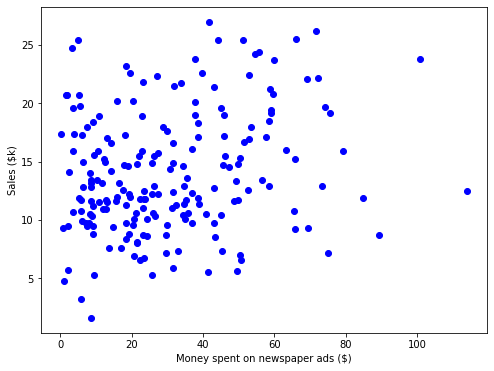

In [8]:
scatter_plot('TV', 'sales')
scatter_plot('radio', 'sales')
scatter_plot('newspaper', 'sales')

In [9]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression

In [15]:
Xs = data.drop(['sales'], axis=1)
y = data['sales'].values.reshape(-1, 1)

lin_reg = LinearRegression()

MSEs = cross_val_score(lin_reg, Xs, y, scoring='neg_mean_squared_error', cv=5)

mean_MSE = np.mean(MSEs)

print(mean_MSE, MSEs)

-3.07294659710021 [-3.1365399  -2.42566776 -1.58522508 -5.42615506 -2.79114519]


In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [17]:
ridge = Ridge()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

ridge_regressor.fit(Xs, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [18]:
print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 20}
-3.0726713383411433


In [19]:
from sklearn.linear_model import Lasso

In [20]:
lasso = Lasso()

parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}

lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

lasso_regressor.fit(Xs, y)

print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-3.0414058967513684


/home/dorella/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 206.16095662790448, tolerance: 0.43829494374999994
  positive)
/home/dorella/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 209.2821617731176, tolerance: 0.42183797500000003
  positive)
/home/dorella/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 240.9706781234667, tolerance: 0.45029244375
  positive)
